In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from matplotlib import style
# style.use('ggplot')
%matplotlib inline

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=15,7
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot

In [386]:
covid = pd.read_excel('DATARAW Covid Jakarta per 1-1-2021.xlsx', engine='openpyxl')
covid = covid.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'])
covid['Tanggal'] = covid['Tanggal'].astype(str) #from jenis data misal integer to str
covid['Bulanan'] = covid['Tanggal'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
covid

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta),Bulanan
0,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2020-03
1,2020-03-02,0,0,2,2,0,0,0,0,0,...,0,2,2,0,0,0,0,0,0,2020-03
2,2020-03-03,0,0,2,2,1,0,0,2,3,...,0,0,0,1,0,0,2,3,2,2020-03
3,2020-03-04,0,0,2,2,1,0,0,2,3,...,0,0,0,0,0,0,0,0,0,2020-03
4,2020-03-05,0,0,2,2,3,0,0,4,7,...,0,0,0,2,0,0,2,4,2,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,2020-12-28,21452,589978,107789,719219,3226,159878,9919,4581,177604,...,6302,-663,5854,22,1263,264,129,1678,393,2020-12
303,2020-12-29,21703,596783,108636,727122,3246,161337,10018,5059,179660,...,6805,847,7903,20,1459,99,478,2056,577,2020-12
304,2020-12-30,21944,603741,109439,735124,3266,162911,9882,5654,181713,...,6958,803,8002,20,1574,-136,595,2053,459,2020-12
305,2020-12-31,22138,611097,109963,743198,3287,164881,9746,5821,183735,...,7356,524,8074,21,1970,-136,167,2022,31,2020-12


##### 1. TREN HARIAN

In [444]:
fig=go.Figure()
# Positif
fig.add_trace(go.Scatter(x=covid['Tanggal'],y=covid['Positif (Jakarta)'], 
                         mode='lines+markers',
                         name='Kasus Positif',
                         line=dict(color='darkmagenta', width=1),
                         marker=dict(color='darkmagenta', size=2.5)))
# sembuh
fig.add_trace(go.Scatter(x=covid['Tanggal'],y=covid['Sembuh (Jakarta)'], 
                         mode='lines+markers',
                         name='Sembuh Harian',
                         line=dict(color='springgreen', width=1),
                         marker=dict(color='springgreen', size=2.5)))
# meninggal
fig.add_trace(go.Scatter(x=covid['Tanggal'],y=covid['Meninggal (Jakarta)'], 
                         mode='lines+markers',
                         name='Meninggal Harian',
                         line=dict(color='lightcoral', width=1),
                         marker=dict(color='lightcoral', size=2.5)))


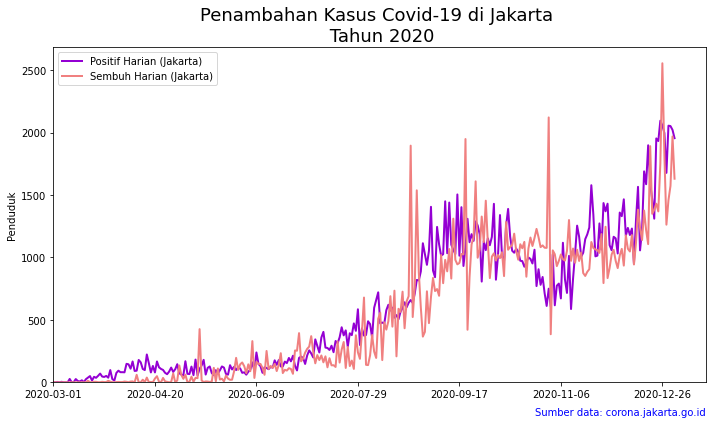

In [352]:
tren = covid[(covid['Tanggal'] >= '2020-01-01') 
                                      & (covid['Tanggal'] <= '2021-01-01')]
fig, ax = plt.subplots(figsize=(10,6))
tren.plot(x='Tanggal',y=['Positif Harian (Jakarta)', 'Sembuh Harian (Jakarta)'], kind='line', ax=ax, lw=2, color=['darkviolet', 'lightcoral'])
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_title('Penambahan Kasus Covid-19 di Jakarta \n Tahun 2020', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Penduduk')
ax.text(1, -0.1, 'Sumber data: corona.jakarta.go.id', color='blue', ha='right', transform=ax.transAxes)
# plt.grid()
plt.tight_layout()

plt.savefig('1. tren.jpeg', dpi=300, bbox_inches='tight')
plt.show()


##### 2. KASUS PERBULAN

In [435]:
positif_b=covid.groupby('Bulanan').sum()['Positif Harian (Jakarta)'].reset_index()
sembuh_b=covid.groupby('Bulanan').sum()['Sembuh Harian (Jakarta)'].reset_index()
meninggal_b=covid.groupby('Bulanan').sum()['Meninggal Harian (Jakarta)'].reset_index()

positif_b.drop(index=10, inplace=True)

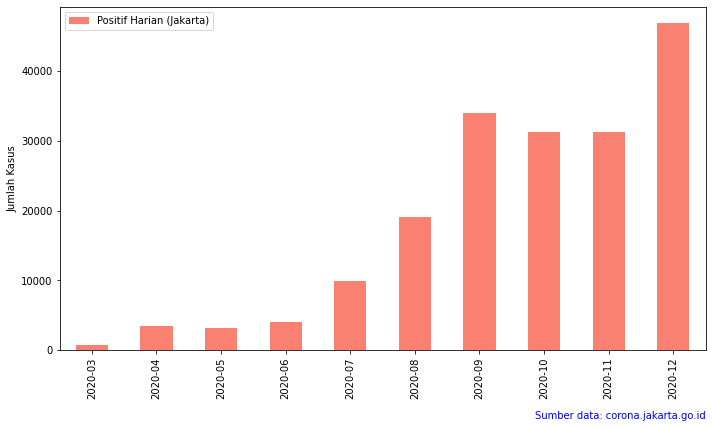

In [437]:

fig, ax = plt.subplots(figsize=(10,6))
positif_b.plot(x='Bulanan',y='Positif Harian (Jakarta)', kind='bar', ax=ax, lw=3, color='salmon')

ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.2, 'Sumber data: corona.jakarta.go.id', color='blue', ha='right', transform=ax.transAxes)
# plt.grid()
plt.tight_layout()
plt.savefig('2.jpeg', dpi=300, bbox_inches='tight')

plt.show()

In [438]:
import plotly.graph_objects as go

fig = go.Figure([
    go.Bar(name='Meninggal Harian', x=meninggal_b['Bulanan'],y=meninggal_b['Meninggal Harian (Jakarta)']),
    go.Bar(name='Positif Harian', x=positif_b['Bulanan'], y=sembuh_b['Sembuh Harian (Jakarta)']),
    go.Bar(name='Sembuh Harian', x=sembuh_b['Bulanan'],y=sembuh_b['Sembuh Harian (Jakarta)'])
    ])
# Change the bar mode
fig.update_layout(barmode='stack')
py.offline.plot(fig, filename="file.html")
fig.show()


##### MARET: KEWASPADAAN

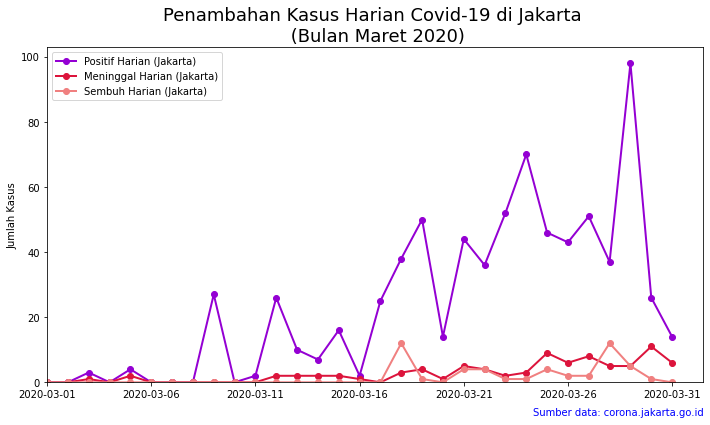

In [414]:
maret = covid[(covid['Tanggal'] >= '2020-02-01') 
                                      & (covid['Tanggal'] <= '2020-03-31')]

fig, ax = plt.subplots(figsize=(10,6))
maret.plot(x='Tanggal',y=['Positif Harian (Jakarta)', 'Meninggal Harian (Jakarta)', 'Sembuh Harian (Jakarta)'], kind='line', ax=ax, lw=2, color=['darkviolet', 'crimson', 'lightcoral'], marker='o')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
ax.set_title('Penambahan Kasus Harian Covid-19 di Jakarta \n (Bulan Maret 2020)', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: corona.jakarta.go.id', color='blue', ha='right', transform=ax.transAxes)
# plt.grid()
plt.tight_layout()
plt.savefig('4.jpeg', dpi=300, bbox_inches='tight')
plt.show()


##### PSBB PERTAMA vs KASUS POSITIF HARIAN

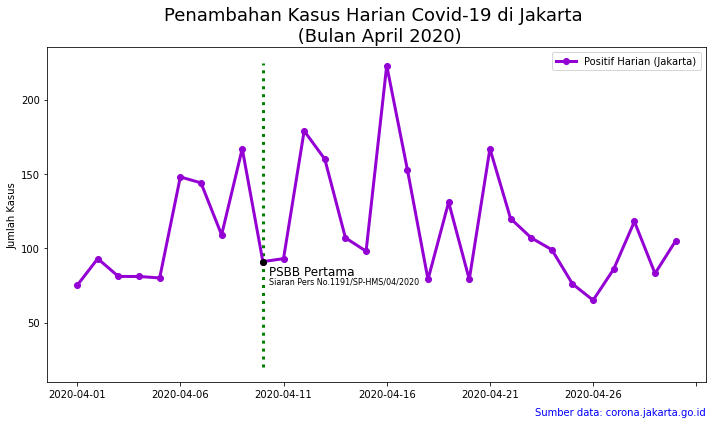

In [425]:
psbb1 = covid[(covid['Tanggal'] >= '2020-04-01') 
                                      & (covid['Tanggal'] <= '2020-04-31')]
fig, ax = plt.subplots(figsize=(10,6))
psbb1.plot(x='Tanggal',y='Positif Harian (Jakarta)', kind='line', ax=ax, lw=3, color='darkviolet', marker='o')

ax.set_title('Penambahan Kasus Harian Covid-19 di Jakarta \n (Bulan April 2020)', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data: corona.jakarta.go.id', color='blue', ha='right', transform=ax.transAxes)
ax.text(9.3, 82, r'PSBB Pertama', fontsize=12)
ax.text(9.3, 76, r'Siaran Pers No.1191/SP-HMS/04/2020', fontsize=8)

ax.plot([9], [91], 'o', color='black')
plt.vlines(x=9, ymin=20, ymax=225, colors='green', ls=':', lw=3, label='vline_single - partial height')
# plt.grid()
plt.tight_layout()
plt.savefig('5.jpeg', dpi=300, bbox_inches='tight')

plt.show()

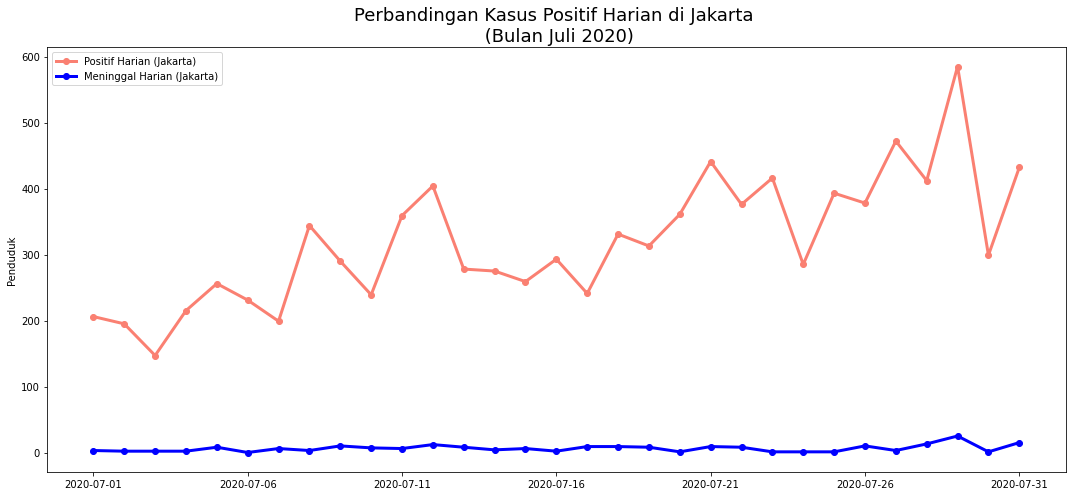

In [245]:
psbb1 = covid[(covid['Tanggal'] >= '2020-07-01') 
                                      & (covid['Tanggal'] <= '2020-07-31')]
fig, ax = plt.subplots(figsize=(15,7))
psbb1.plot(x='Tanggal',y=['Positif Harian (Jakarta)','Meninggal Harian (Jakarta)'] , kind='line', ax=ax, lw=3, color=['salmon', 'blue'], marker='o')

ax.set_title('Perbandingan Kasus Positif Harian di Jakarta \n (Bulan Juli 2020)', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Penduduk')

# plt.grid()
plt.tight_layout()
plt.show()

30 DES: PSBB 